In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from simplified_monorotor import Monorotor
import plotting
import testing
import trajectories

pylab.rcParams['figure.figsize'] = 10,10

**NOTE** - we are just going to be importing the `Monorotor` class defined in the previous notebook.

If you want to inspect that code then you can:

1. Click the Jupyter icon in the top left corner of the notebook. This will take you to a navigation page showing all the files in this workspace.

2. Open `simplified_monorotor.py` and inspect the class defined there.

3. You can also open `controllers.py` if you want to see the `OpenLoopController` from earlier. This file contains reference solutions to all the controllers we will be working with in this lesson. Try not to peek at the solutions for the later controllers!

# P controller 

#### Implement P controller

Implement the P Controller math in `thrust_control`:

$$
\begin{align}
e &= z_{\text{target}} - z
\\
\bar{u} &= k_p e
\\
u &= m(g - \bar{u})
\end{align}
$$

In [3]:
class PController:
    
    def __init__(self, k_p, m):
        self.k_p = k_p 
        self.vehicle_mass = m   
        self.g = 9.81
    
    def thrust_control(self, z_target, z_actual):
        
        # delta_z
        e = z_target - z_actual

        # u_bar = z_dot_dot
        z_dot_dot = self.k_p *  e

        # u = m*(g-u_bar)
        thrust = self.vehicle_mass * (self.g - z_dot_dot)
        return thrust 
    
testing.p_controller_test(PController)

Tests pass


#### TODO 2 - Explore p controller trajectories
Once you see "Tests pass", your PController should be working! The code below attempts to fly the vehicle up to $z=-1$ from its start position at $z=0$ (this is also called a "step function" change in position).

Now, try playing around with the code below. Answer the following questions for yourself:

1. What do "p controlled" trajectories generally look like (when trying to follow a step function change in position)?

2. How do changes to K_P influence the resulting trajectory?

3. How robust is this controller to changes in `MASS_ERROR`? Try changing the value to 1.5 and observing the result. Compare this to the open loop plot when this parameter was just 1.01.

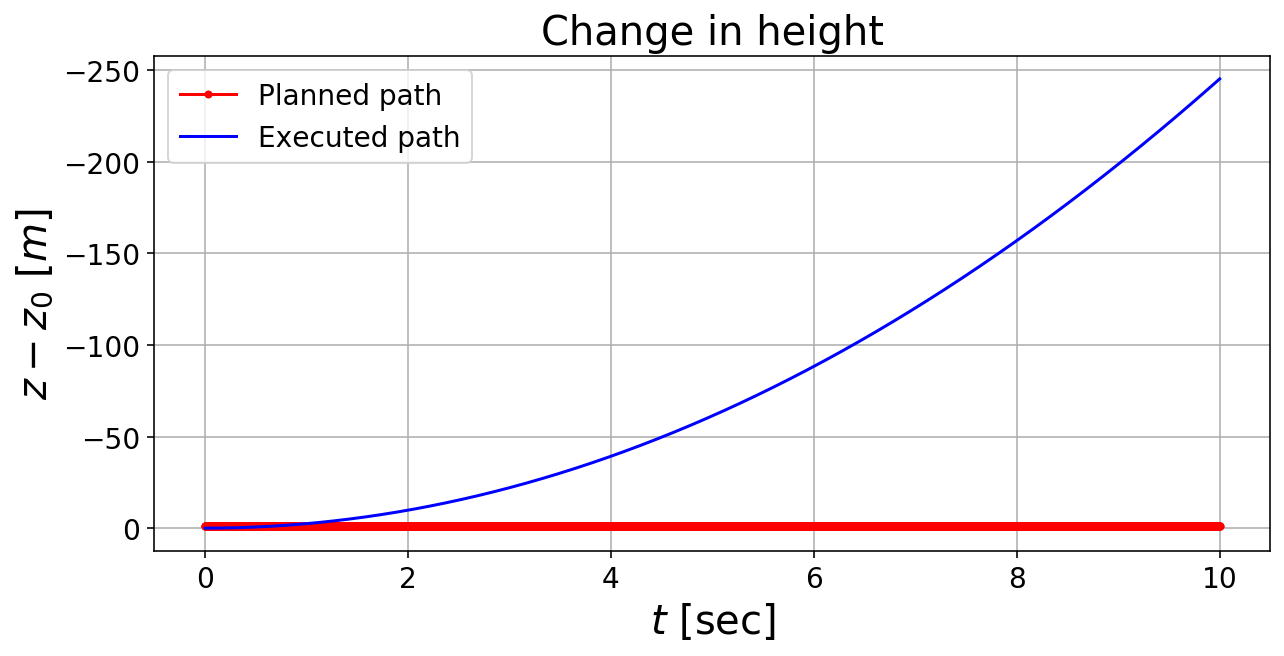

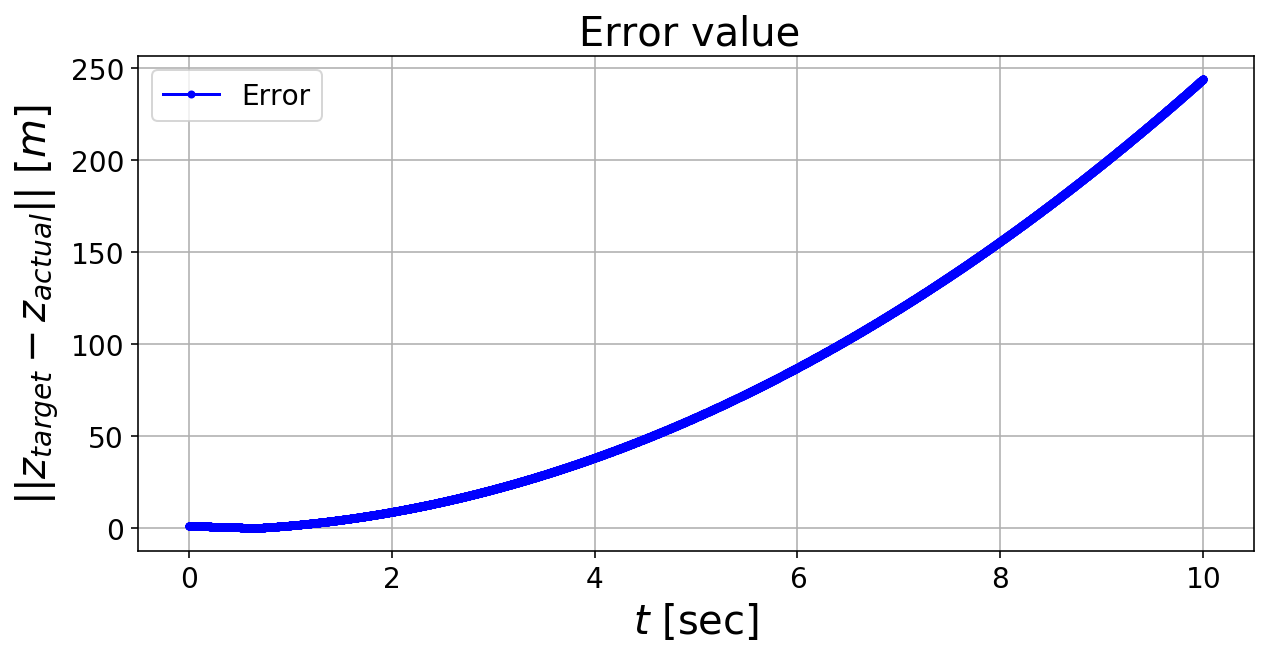

In [4]:
MASS_ERROR = 1.5
K_P = 0.0

# preparation
drone = Monorotor()
perceived_mass = drone.m * MASS_ERROR
controller = PController(K_P, perceived_mass)

# generate trajectory
total_time = 10.0
dt = 0.001
t=np.linspace(0.0,total_time,int(total_time/dt))
z_path= -np.ones(t.shape[0])


# run simulation
history = []
for z_target in z_path:
    z = drone.z
    u = controller.thrust_control(z_target, z) 
    drone.thrust = u
    drone.advance_state(dt)
    history.append(drone.X)

    
# generate plots
z_actual = [h[0] for h in history]
plotting.compare_planned_to_actual(z_actual, z_path, t)    